In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random as rd

In [3]:
df = pd.read_csv('insurance.csv')

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df['smoker'] = [bool(sm =='yes') for sm in df['smoker']]
df['sex_male'] = [bool(sm =='yes') for sm in df['sex']]

In [6]:
df['smoker'].head()

0     True
1    False
2    False
3    False
4    False
Name: smoker, dtype: bool

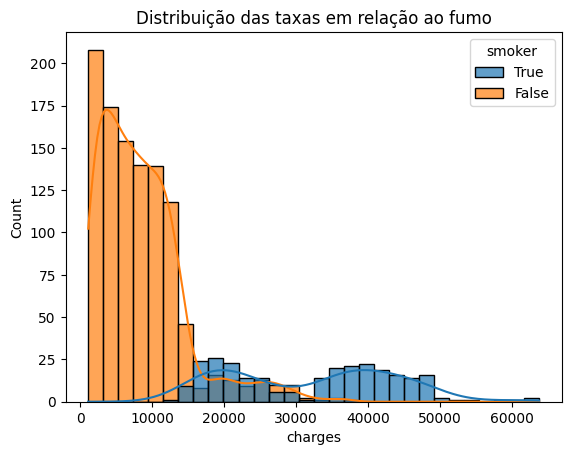

In [7]:
sns.histplot(df, x='charges', hue='smoker', kde=True, hue_order=[True, False], alpha=.7)
plt.title('Distribuição das taxas em relação ao fumo')
plt.show()

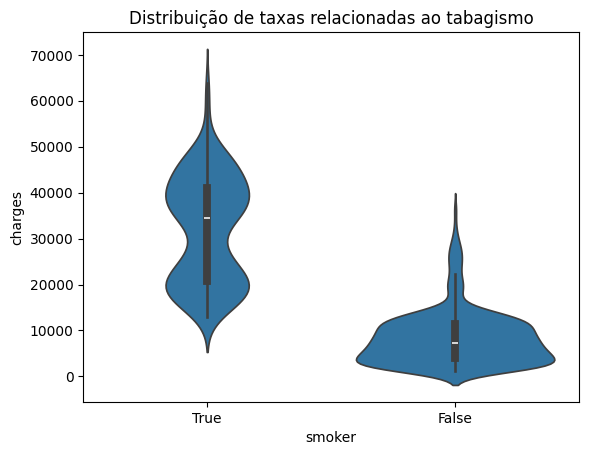

In [8]:
sns.violinplot(data=df, y='charges', x='smoker', order=[True, False])
plt.title('Distribuição de taxas relacionadas ao tabagismo')
plt.show()

In [9]:
df['charges/age'] = df['charges'] - df['age']*200

In [10]:
from sklearn.cluster import KMeans

In [11]:
X = np.array(df[['charges/age']])
modelo = KMeans(n_clusters=3, max_iter=500, init=np.array([16000, 28000, 48000]).reshape(-1, 1), n_init=1)
modelo = modelo.fit(X.reshape(-1, 1))

In [12]:
df['cluster'] = modelo.labels_

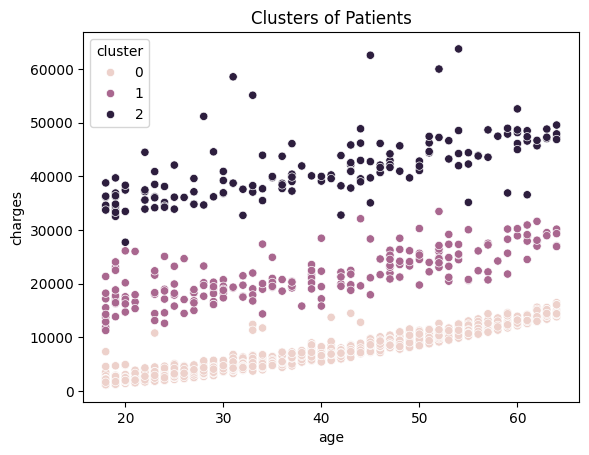

In [13]:
sns.scatterplot(data=df, x='age', y='charges', hue='cluster')
plt.title('Clusters of Patients')
plt.show()

In [14]:
# ...existing code...

df.to_csv('arquivo_pbi.csv', index=False)

# ...existing code...